In [57]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [5]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print(f"Data imported successfully, dataset has {s_data.shape[0]} rows and {s_data.shape[1]} columns")
s_data.head()

Data imported successfully, dataset has 25 rows and 2 columns


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

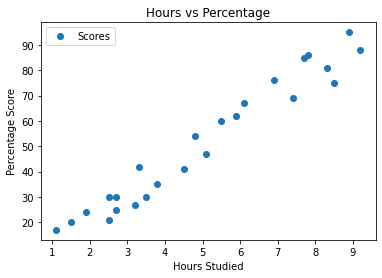

In [25]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [7]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0, shuffle=True) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [138]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [135]:
def plot_model(model, label):
    # Plotting the regression line
    line = regressor.coef_*X+regressor.intercept_

    # Plotting for the test data
    plt.scatter(X, y) 
    plt.plot(X, line, label=f'{label}');
    plt.legend()
    plt.show()

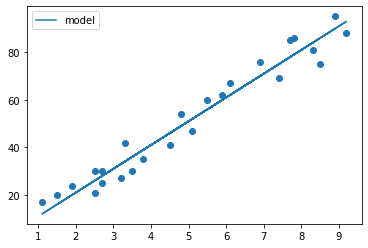

In [136]:
plot_model(regressor, 'model')


### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [59]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [129]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict(np.array(hours).reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.33055191794165


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [137]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.936582797011825


In [ ]:
def cross_validation():
    

In [132]:
rs = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
n_fold = 1

fold 1/5......
Mean Absolute Error: 4.183859899002975
fold 2/5......
Mean Absolute Error: 4.91199981927983
fold 3/5......
Mean Absolute Error: 4.480569024529381
fold 4/5......
Mean Absolute Error: 4.643688920287295
fold 5/5......
Mean Absolute Error: 4.936582797011825


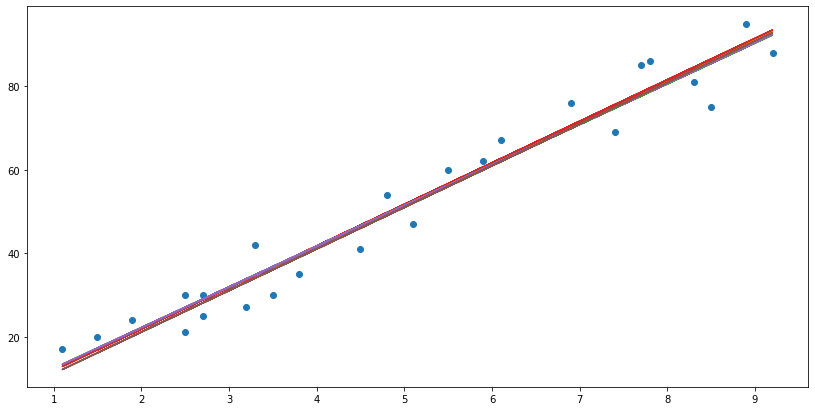

In [120]:
rs = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
n_fold = 1
plt.figure(figsize=(14, 7))
plt.scatter(X, y)
plt.plot(X, line)

scores = []
models = []
for train_indices, test_indices in rs.split(s_data):
    print('fold {}/5......'.format(n_fold)) 
    x_train = X[train_indices, ...]
    y_train = y[train_indices, ...]
    regressor.fit(x_train, y_train)
    line = regressor.coef_*X+regressor.intercept_
    plt.plot(X, line)
    x_test = X[test_indices, ...]
    y_test = y[test_indices, ...]
    y_pred = regressor.predict(x_test)
    print('Mean Absolute Error:', 
        metrics.mean_absolute_error(y_test, y_pred)) 
    scores.append(metrics.mean_absolute_error(y_test, y_pred))
    n_fold += 1

In [ ]:
    line = regressor.coef_*X+regressor.intercept_
    subplot(n_fold)
    plt.scatter(X, y)
    plt.plot(X, line)

In [112]:
sum(scores)/len(scores)

4.631340092022262

In [109]:
models

AttributeError: 'list' object has no attribute 'mean'

In [139]:
scores = cross_val_score(regressor, X, y,
 scoring="neg_mean_squared_error", cv=5)

In [140]:
scores

array([-81.39057013, -16.50540159, -35.46753166, -23.8069231 ,
       -35.18429566])

In [145]:
rmse_scores = np.sqrt(-scores)
rmse_scores


array([9.02167225, 4.06268404, 5.95546234, 4.87923386, 5.93163516])